In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

In [33]:
#Importing the data
df = pd.read_csv("HY_Universe_corporate bond.csv")
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [34]:
#shape of the data and the data type
print("Number of Columns :", len(df.columns))
print("Number of Rows :", len(df))

def get_type(x):
    return type(x).__name__

result = df.applymap(get_type)
counts = result.apply(pd.value_counts)
counts.fillna(0,inplace=True)
df_melted = df.melt(var_name='columns', value_name='values')
counts = counts.T

counts

Number of Columns : 37
Number of Rows : 2721


,float,int,str
CUSIP,0.0,0.0,2721.0
Ticker,0.0,0.0,2721.0
Issue Date,0.0,0.0,2721.0
Maturity,0.0,0.0,2721.0
1st Call Date,0.0,0.0,2721.0
Moodys,0.0,0.0,2721.0
S_and_P,0.0,0.0,2721.0
Fitch,0.0,0.0,2721.0
Bloomberg Composite Rating,0.0,0.0,2721.0
Coupon,2721.0,0.0,0.0


In [6]:
#Summary Statistics
df.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721.000000,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
mean,10.307872,8.299295e+08,113.968997,18.218230,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,...,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,63.051382,5.802790e+08,101.893176,7.872071,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,...,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,0.000000,3.700000e+08,11.930000,4.388758,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,...,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,5.000000,5.000000e+08,65.170000,12.738630,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,...,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,6.250000,6.500000e+08,97.370000,16.538471,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,...,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,7.750000,1.000000e+09,121.770000,22.120108,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,...,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000
max,999.000000,7.364026e+09,1217.570000,54.673908,0.546739,57935.000000,8.979960e+09,3.400000e+06,3.400000e+06,1667.000000,...,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,8.728140e+08,1.002500e+08,513.769231,160.000000


In [35]:
#counting the unique values
coupon_type = df['Coupon Type']
print(coupon_type.value_counts().index.to_list())
print("# of each coupon type")
print(coupon_type.value_counts())

['FIXED', 'DEFAULTED', 'FLOATING', 'VARIABLE', 'EXCHANGED', 'PAY-IN-KIND', 'FLAT TRADING', 'ZERO COUPON', 'STEP CPN', 'FUNGED']
# of each coupon type
FIXED           2139
DEFAULTED        184
FLOATING         124
VARIABLE         111
EXCHANGED        102
PAY-IN-KIND       41
FLAT TRADING       7
ZERO COUPON        7
STEP CPN           4
FUNGED             2
Name: Coupon Type, dtype: int64


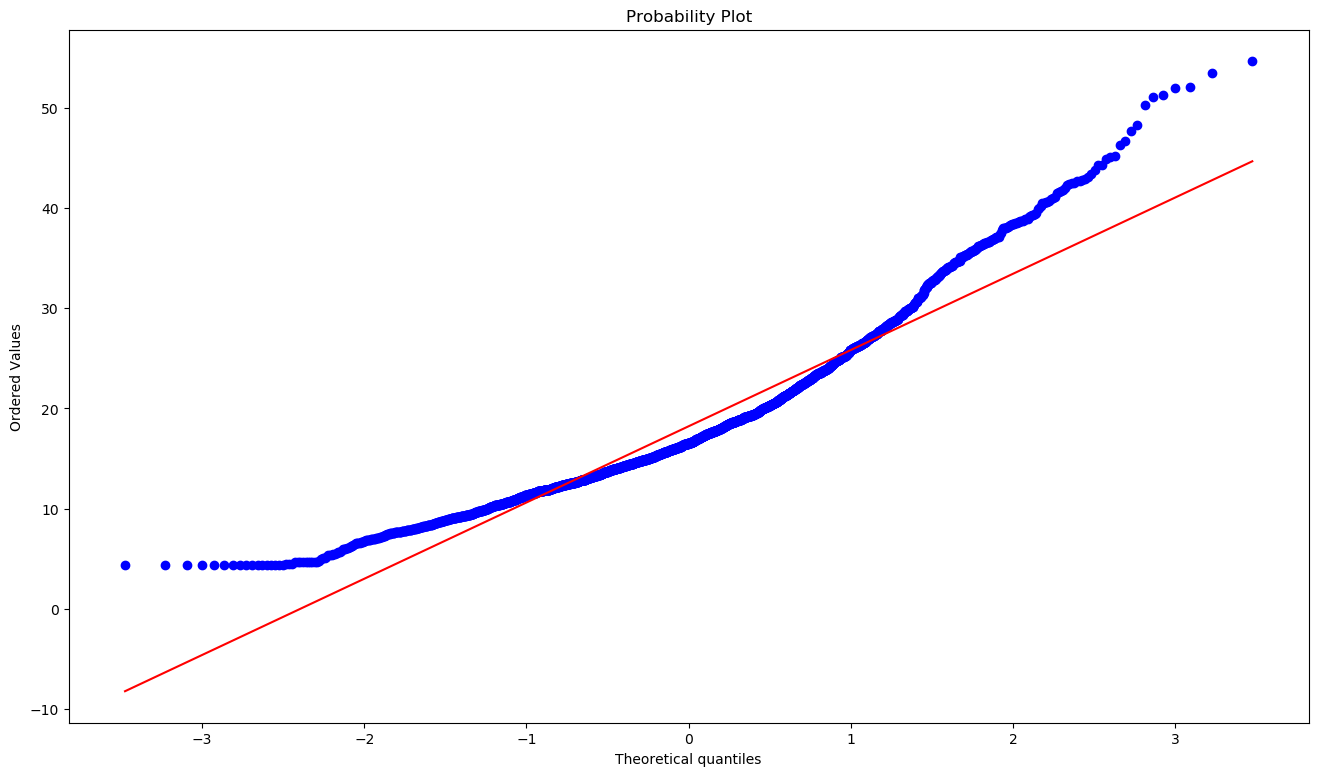

LiquidityScore does not look Gaussian (reject H0)


In [30]:
import scipy.stats as stats
#Q-Q plot

def p_test(p,alpha):
    if p > alpha:
        print("LiquidityScore looks Gaussian (fail to reject H0)")
    else:
        print("LiquidityScore does not look Gaussian (reject H0)")

stats.probplot(df['LiquidityScore'],dist='norm',plot=plt)
plt.show()
stat, p = stats.shapiro(df['LiquidityScore'])
p_test(p,0.5)

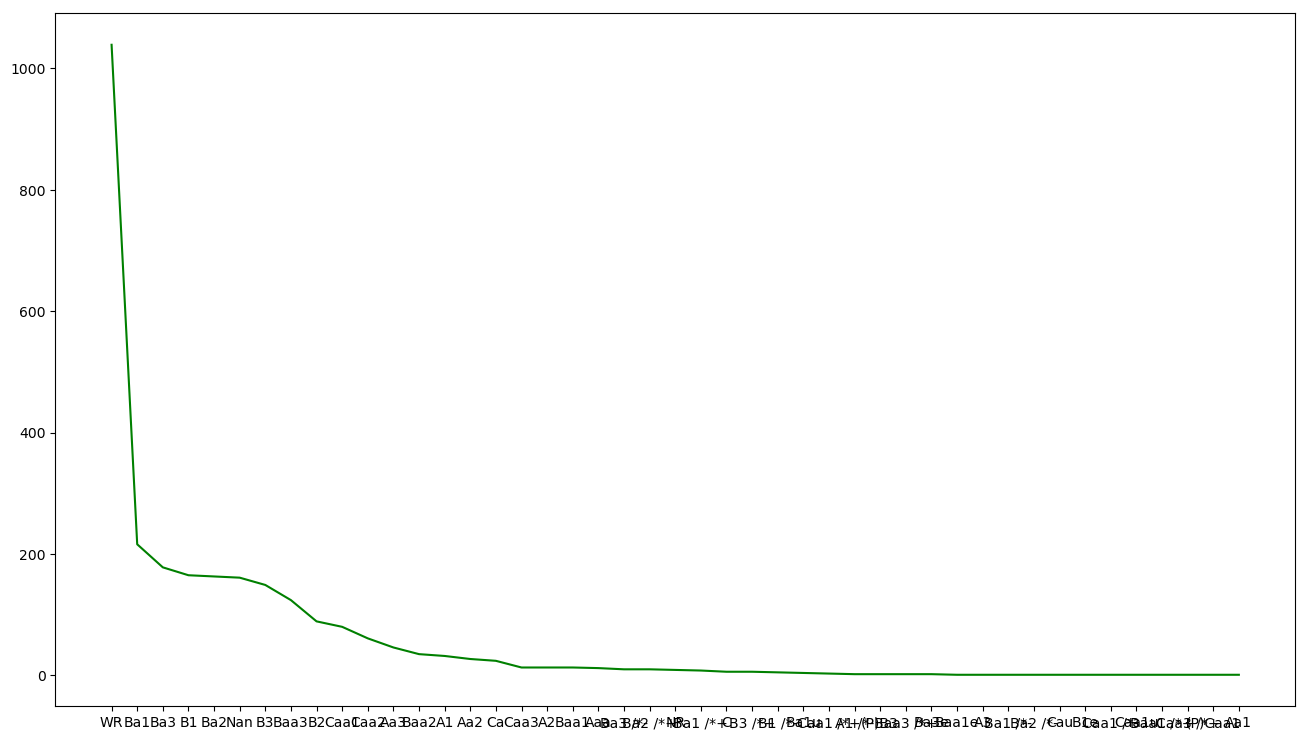

In [28]:
# line plot
plt.plot(df['Moodys'].value_counts(), color='green')
plt.show()

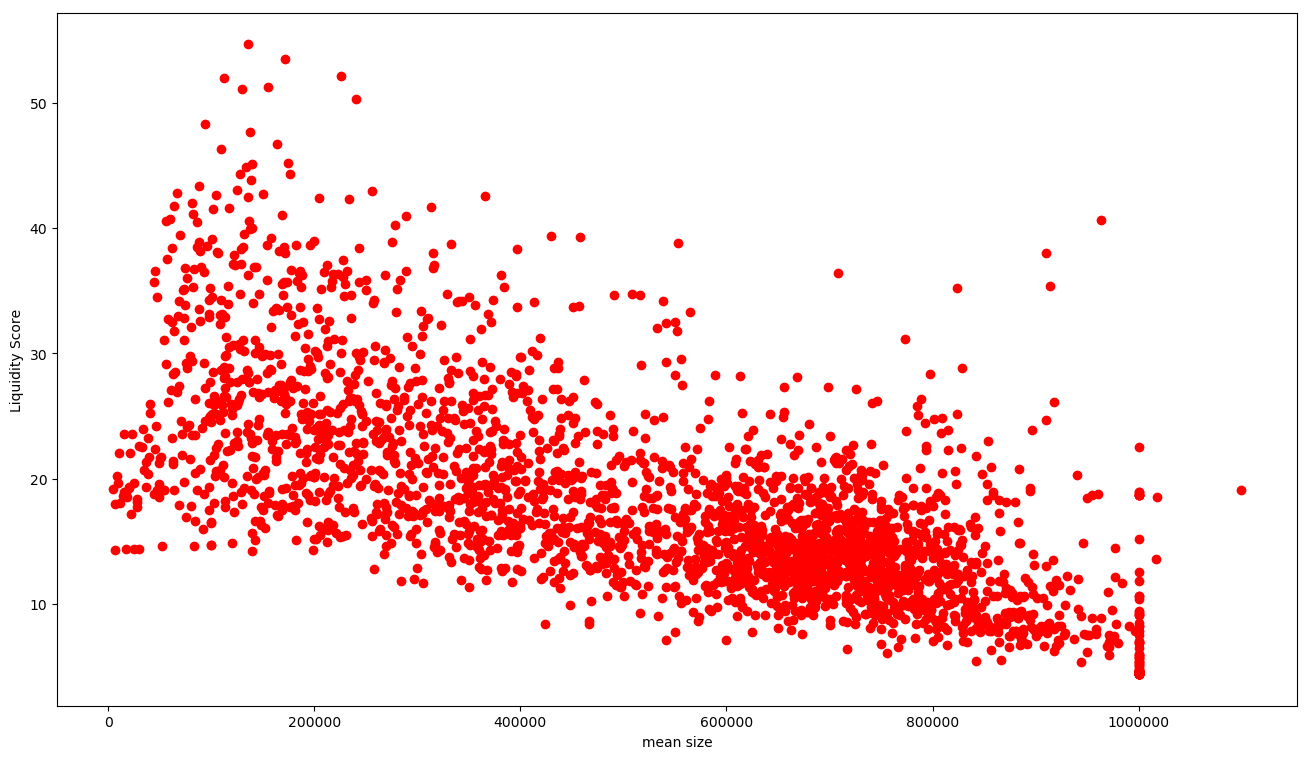

In [29]:
#Scatter plot of mean size and the liquidity score
df_2 = df.loc[df['total_mean_size'] <= 1500000]
plt.scatter(df_2['total_mean_size'],df_2['LiquidityScore'],color='red')
plt.xlabel("mean size")
plt.ylabel("Liquidity Score")
plt.show()

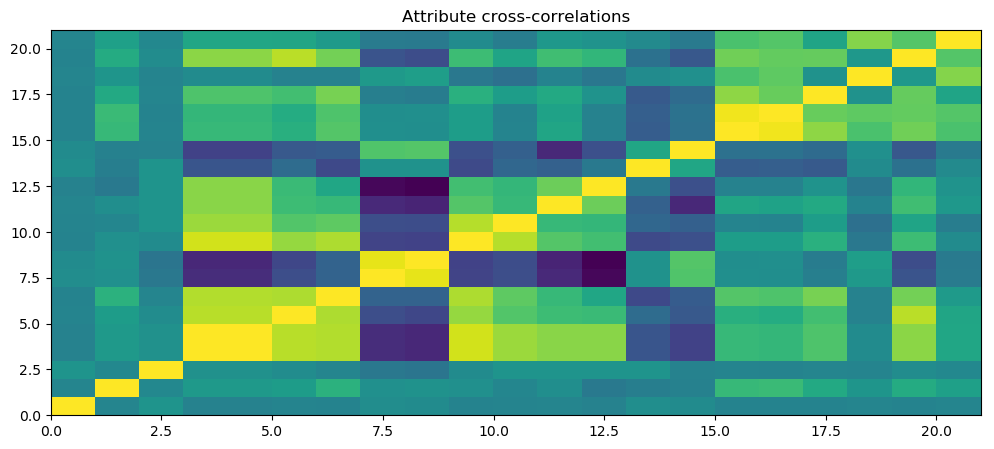

In [36]:
#Heatmap for vusualizing correlations
corMat = pd.DataFrame(df.corr())

plt.figure(figsize=[12,5])
plt.title("Attribute cross‐correlations")
plt.pcolor(corMat)
plt.show()

In [2]:
print("My name is Hyoung Woo Hahm")
print("My NetID is: 661790448")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hyoung Woo Hahm
My NetID is: 661790448
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
